In [16]:
import pandas as pd

df = pd.read_csv("/content/nba_games.csv")
print(df.head())    # preview of dataset

  GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
0    2022-12-22  22200477            Final    1610612740       1610612759   
1    2022-12-22  22200478            Final    1610612762       1610612764   
2    2022-12-21  22200466            Final    1610612739       1610612749   
3    2022-12-21  22200467            Final    1610612755       1610612765   
4    2022-12-21  22200468            Final    1610612737       1610612741   

   SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  FT_PCT_home  ...  AST_home  \
0    2022    1610612740     126.0        0.484        0.926  ...      25.0   
1    2022    1610612762     120.0        0.488        0.952  ...      16.0   
2    2022    1610612739     114.0        0.482        0.786  ...      22.0   
3    2022    1610612755     113.0        0.441        0.909  ...      27.0   
4    2022    1610612737     108.0        0.429        1.000  ...      22.0   

   REB_home  TEAM_ID_away  PTS_away  FG_PCT_away  FT_PCT_away  FG3_P

In [17]:
# drop entire row if any missing values
df.dropna(inplace=True)

# encode 'Win' column as 1 or 0
df["Win"] = df["PTS_home"] > df["PTS_away"]
df["Win"] = df["Win"].astype(int)

# select features
features = ["FG_PCT_home", "FG_PCT_away", "REB_home", "AST_home"]
X = df[features]
y = df["Win"]


In [18]:
# splitting data for training/testing

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # X and y i.e explanatory and response variables respectively

# train the model
model = RandomForestClassifier(n_estimators=100, random_state=34) # 100 decision trees in random forest
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Prediction Accuracy: {accuracy:.2f}")


Prediction Accuracy: 0.79


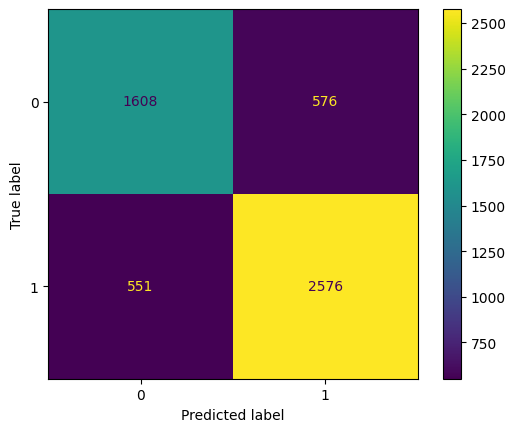

In [19]:
# visual representation through confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)


In [20]:
# create data frame

# example matchup
new_game = pd.DataFrame([{
    "FG_PCT_home": 0.48,
    "FG_PCT_away": 0.45,
    "REB_home": 44,
    "AST_home": 25
}])

prediction = model.predict(new_game)
print("Predicted Win" if prediction[0] == 1 else "Predicted Loss")


Predicted Win
